In [2]:
from hydra import initialize, compose
import json
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from pathlib import Path

In [11]:
with initialize(version_base=None, config_path="./conf/filepaths"):
    cfg = compose(config_name="filepaths")

In [14]:
with open(Path(cfg.raw_data) / "mcsa" / "entries_0.json", "r") as f:
    entries = json.load(f)

In [18]:
entries['49']['reaction']['compounds']

[{'count': 1,
  'type': 'product',
  'chebi_id': '16526',
  'name': 'carbon dioxide',
  'mol_file': 'www.ebi.ac.uk/thornton-srv/m-csa/media/compound_mols/16526.mol'},
 {'count': 1,
  'type': 'reactant',
  'chebi_id': '15378',
  'name': 'hydron',
  'mol_file': 'www.ebi.ac.uk/thornton-srv/m-csa/media/compound_mols/15378_Fxpq4oZ.mol'},
 {'count': 1,
  'type': 'product',
  'chebi_id': '58432',
  'name': 'histaminium',
  'mol_file': 'www.ebi.ac.uk/thornton-srv/m-csa/media/compound_mols/58432.mol'},
 {'count': 1,
  'type': 'reactant',
  'chebi_id': '57595',
  'name': 'L-histidine zwitterion',
  'mol_file': 'www.ebi.ac.uk/thornton-srv/m-csa/media/compound_mols/57595.mol'}]

11


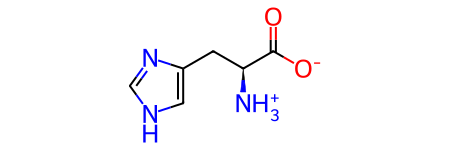

In [38]:
mol = Chem.MolFromMolFile(Path(cfg.raw_data) / "mcsa" / "mols" / "57595.mol", removeHs=False)
print(mol.GetNumAtoms())
mol

In [27]:
Chem.MolToSmiles(mol)

'[NH3+][C@@H](Cc1c[nH]cn1)C(=O)[O-]'

In [31]:
entries['49']['reaction']['mechanisms'][0]['steps']

[{'step_id': 1,
  'description': 'The C-terminal serine deprotonates the amine of the substrate, which attacked the terminal carbonyl carbon of the PTM pyruvoyl residue in the first step of a Schiff base formation. The oxyanion deprotonates Tyr62.',
  'figure': 'www.ebi.ac.uk/thornton-srv/m-csa/media/schemes_svg/Step_macie.49.1.1_kEdB5Xs',
  'is_product': False,
  'marvin_xml': 'www.ebi.ac.uk/thornton-srv/m-csa/media/schemes/Step_macie.49.1.1_kEdB5Xs.mrv'},
 {'step_id': 2,
  'description': 'Tyr62 deprotonates the newly formed secondary amine, which causes the elimination of water with concomitant deprotonation of the C-terminal serine residue, forming the Schiff base.',
  'figure': 'www.ebi.ac.uk/thornton-srv/m-csa/media/schemes_svg/Step_macie.49.1.2_cT1EYGR',
  'is_product': False,
  'marvin_xml': 'www.ebi.ac.uk/thornton-srv/m-csa/media/schemes/Step_macie.49.1.2_cT1EYGR.mrv'},
 {'step_id': 3,
  'description': 'The intermediate undergoes decarboxylation, with double bond rearrangement 

In [35]:
with open(Path(cfg.raw_data) / "mcsa" / "mech_steps" / "41_1_1.mrv", "r") as f:
    lines = []
    for line in f.readlines():
        lines.append(line.strip())

In [36]:
print(lines)

['<cml>', '<MDocument>', '<MChemicalStruct>', '<molecule molID="m1">', '<atomArray>', '<atom id="a1" elementType="Mg" x2="21.39788522974944" y2="-12.848504604123802" formalCharge="2" mrvExtraLabel="chebi:18420"/>', '<atom id="a2" elementType="Mg" x2="17.788763330560833" y2="-21.71931347477796" formalCharge="2" mrvExtraLabel="chebi:18420"/>', '<atom id="a3" elementType="N" x2="14.490460405931936" y2="-14.087280748309523" mrvAlias="R" lonePair="1"/>', '<atom id="a4" elementType="C" x2="15.116834836268666" y2="-15.494140753079126"/>', '<atom id="a5" elementType="O" x2="16.62318214139873" y2="-15.814324756938479" lonePair="2"/>', '<atom id="a6" elementType="C" x2="16.784155974830913" y2="-17.34588847580562"/>', '<atom id="a7" elementType="C" x2="15.377295970061311" y2="-17.97226290614235"/>', '<atom id="a8" elementType="C" x2="14.346834836268672" y2="-16.827819874907167"/>', '<atom id="a9" elementType="O" x2="19.451514218486984" y2="-17.345888475805612" lonePair="2"/>', '<atom id="a10" ele

In [37]:
mol = Chem.MolFromMolFile(Path(cfg.raw_data) / "mcsa" / "mols" / "32526.mol", removeHs=False)
mol

OSError: Bad input file /home/stef/enz_rxn_data/data/raw/mcsa/mols/32526.mol

In [5]:
Chem.Atom('C').GetAtomicNum()

6

In [10]:
rw = Chem.RWMol()
aidx = rw.AddAtom(Chem.Atom('C'))
rw.GetAtomWithIdx(aidx).SetProp('mcsa_id', 'a56')
rw.GetAtomWithIdx(aidx).GetProp('mcsa_id')
rw.GetAtomWithIdx(aidx).SetFormalCharge(-1)

In [ ]:
rw.GetAtomWithIdx(aidx).Set